In [1]:
from PySDM_examples.Lowe_et_al_2019 import Settings, Simulation
from PySDM_examples.Lowe_et_al_2019.aerosol import AerosolMarine, AerosolBoreal

#!pip install -e ~/Research/PySDM
import PySDM
print(PySDM.__file__)
from PySDM.initialisation.sampling import spectral_sampling as spec_sampling
from PySDM.physics import si

import numpy as np
import os
from matplotlib import pyplot
import matplotlib
from joblib import Parallel, delayed, parallel_backend
import numba

/Users/claresinger/Research/PySDM/PySDM/__init__.py


In [2]:
numba.config.NUMBA_NUM_THREADS=1
rtol_x = 1e-3
rtol_thd = 1e-3

In [3]:
CI = 'CI' in os.environ

updraft_list = np.geomspace(0.1, 10, 1)
forg_list = np.linspace(0.1, 0.9, 1)

subplot_list = ["b"]
models = ('bulk', 'film')

Acc = {"a": 30, "b": 134, "c": 160, "d": 540}

In [4]:
def compute(key, settings):
    settings.output_interval = 1.0 * si.s
    settings.rtol_x = rtol_x
    settings.rtol_thd = rtol_thd
    simulation = Simulation(settings)
    output = simulation.run()
    output['updraft'] = settings.w
    output['org_fraction'] = settings.aerosol.aerosol_modes_per_cc[0]['f_org']
    output['color'] = settings.aerosol.color
    return key, output

print(f'tasks scheduled: {len(models) * len(subplot_list) * len(forg_list) * len(updraft_list)}')
with parallel_backend('loky', n_jobs=-1):
    output = dict(Parallel(verbose=10)(
        delayed(compute)(subplot+f"_w{w:.2f}_f{Forg:.2f}_"+model, Settings(
            dt = 1.0 * si.s, 
            n_sd_per_mode = 100, 
            model = model,
            aerosol = {
                "a": AerosolMarine(Acc_Forg=Forg, Acc_N2=Acc["a"]), 
                "b": AerosolMarine(Acc_Forg=Forg, Acc_N2=Acc["b"]), 
                "c": AerosolBoreal(Acc_Forg=Forg, Acc_N2=Acc["c"]), 
                "d": AerosolBoreal(Acc_Forg=Forg, Acc_N2=Acc["d"])
            }[subplot],
            w = w * si.m / si.s,
            spectral_sampling = spec_sampling.ConstantMultiplicity
        ))
        for w in updraft_list
        for Forg in forg_list
        for subplot in subplot_list
        for model in models
    ))

tasks scheduled: 2


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


7.074155081793125e-09 2.5561924423976007e-06 4.3981092625157375e-12
9.69565444191995e-09 3.4232778771096044e-06 5.967359247832561e-12
1.1401088500435437e-08 3.96281616760155e-06 6.969200669669816e-12
1.2772176300551983e-08 4.382562568913203e-06 7.763493077855515e-12
1.3960753326257162e-08 4.736409131598402e-06 8.443918933228757e-12
1.5032381207034438e-08 5.047545227780517e-06 9.050867106147304e-12
1.6022133047481076e-08 5.3283427266317685e-06 9.605915205441075e-12
1.69512608709837e-08 5.586279128394116e-06 1.0122119319610792e-11
1.783375241332846e-08 5.82626267858634e-06 1.0608058423433799e-11
1.8679377424737008e-08 6.051710890900185e-06 1.1069712233519904e-11
1.9495273658127747e-08 6.265111328167285e-06 1.1511438374464232e-11
2.0286844163974218e-08 6.468338544620815e-06 1.1936524999749857e-11
2.10582985158711e-08 6.6628450868010656e-06 1.2347523997423263e-11
2.181299626490484e-08 6.849782603928663e-06 1.2746462364813774e-11
2.2553674102342928e-08 7.030081890577643e-06 1.31349819623322

[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   27.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   27.7s finished


4.914510425074877e-08 1.1831225385655188e-05 2.5210993448610572e-11
5.009778555772654e-08 1.195612097875517e-05 2.5581715849344932e-11
5.097607290511533e-08 1.2069065800060393e-05 2.5920052661962504e-11
5.187931707874176e-08 1.2183074576656264e-05 2.6264601358974916e-11
5.272070499245946e-08 1.2287364531580376e-05 2.6582482882252574e-11
5.372286540528513e-08 1.2409235554177606e-05 2.6957280940634447e-11
5.4671792123404437e-08 1.252233959128697e-05 2.7308380107226837e-11
5.551878512195494e-08 1.2621456513646463e-05 2.7618685078738735e-11
5.65023874271927e-08 1.2734438085349081e-05 2.7975434202995836e-11
5.751547095031108e-08 1.2848482114518719e-05 2.8338873568243985e-11
5.8551445769702656e-08 1.2962729087531597e-05 2.8706376493240076e-11
5.965303969653178e-08 1.3081651513970055e-05 2.909261446123512e-11
6.076498709927681e-08 1.319909022870291e-05 2.947779740836645e-11
6.185334821536127e-08 1.33115790989112e-05 2.9850313697279825e-11
6.311553573412954e-08 1.3439078491615534e-05 3.0276835

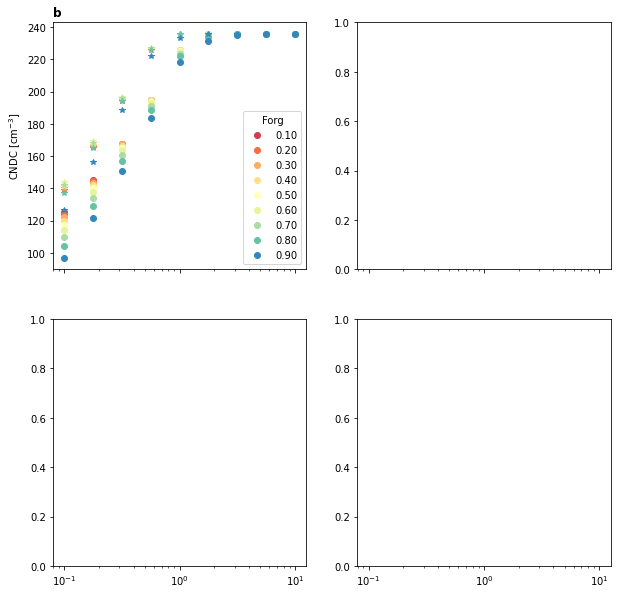

In [10]:
fig,axes = pyplot.subplots(2,2,figsize=(10,10),sharex=True,sharey=False)

f0 = open("PySDM_Marine_0.txt","w")
f1 = open("PySDM_Marine_1.txt","w")

f0.write("parcel disp = 200.00 \n")
f0.write("updraft (m/s), forg, CDNC (cm-3) \n")
f1.write("parcel disp = 200.00 \n")
f1.write("updraft (m/s), forg, CDNC (cm-3) \n")

for k,subplot in enumerate(subplot_list):
    for i,w in enumerate(updraft_list):
        for j,Forg in enumerate(forg_list):
                key = subplot+"_w{:.2f}_f{:.2f}_".format(w,Forg)
                var = 'n_c_cm3'
                z = np.array(output[key+"film"]['z'])
                CDNC_film = np.array(output[key+"film"][var])
                CDNC_bulk = np.array(output[key+"bulk"][var])
                
                ax = axes.flatten()[k]
                ax.set_title(subplot, loc="left", weight="bold")
                
                cmap = matplotlib.cm.get_cmap('Spectral')
                if i == 0:
                    ax.plot(w, CDNC_bulk[-1], 'o', color=cmap(Forg), label="{:.2f}".format(Forg))
                    ax.plot(w, CDNC_film[-1], '*', color=cmap(Forg))
                else:
                    ax.plot(w, CDNC_bulk[-1], 'o', color=cmap(Forg))
                    ax.plot(w, CDNC_film[-1], '*', color=cmap(Forg))
                
                if subplot == "b":
                    f0.write("{:.2e}, {:.2f}, {:.2f} \n".format(w, Forg, CDNC_bulk[-1]))
                    f1.write("{:.2e}, {:.2f}, {:.2f} \n".format(w, Forg, CDNC_film[-1]))
                
                ax.set_xscale("log")
                if k == 0:
                    ax.legend(title="Forg")
                    ax.set_ylabel("CNDC [cm$^{-3}$]")
                if k == 2:
                    ax.set_ylabel("CNDC [cm$^{-3}$]")
                if k > 1:
                    ax.set_xlabel("updraft velocity [m/s]")
                
pyplot.show()

f0.close()
f1.close()